## Sales Data Demo 

**Dataset Structure**
- `order_id`: Unique identifier for each order
- `order_date`: When the order was placed
- `customer_id`: Unique identifier for each customer
- `product_category`: Type of product (Electronics, Clothing, etc)
- `product_name`: Specific product name
- `quantity`: units sold 
- `unit_price`: price per unit
- `region`: Geographic region (North, South)
- `sales_person`: Name of the sales rep who sold the product

In [1]:
# In this cell, we're writing actual Python code

# Imports
import pandas as pd 
import matplotlib.pyplot as plt 

# Pulling in my sales data
sales_df = pd.read_csv('data/sales_data.csv')

## Section 1: DataFrame inspection

In [2]:
# First 5 rows
sales_df.head()

,order_id,order_date,customer_id,product_category,product_name,quantity,unit_price,region,sales_person
0,ORD0001,2024-04-12,CUST535,Electronics,Laptop,8,NaN,East,Diana
1,ORD0002,2024-04-12,CUST221,Clothing,Jeans,3,108.98,North,Bob
2,ORD0003,2024-03-28,CUST472,Books,Novel,4,151.44,North,Bob
3,ORD0004,2024-05-10,CUST761,Clothing,Jeans,5,970.21,North,NaN
4,ORD0005,2024-10-20,CUST485,Books,Textbook,5,621.31,West,Ethan


In [3]:
sales_df.info() # Dataset info 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          100 non-null    object 
 1   order_date        100 non-null    object 
 2   customer_id       95 non-null     object 
 3   product_category  100 non-null    object 
 4   product_name      95 non-null     object 
 5   quantity          100 non-null    int64  
 6   unit_price        99 non-null     float64
 7   region            95 non-null     object 
 8   sales_person      95 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [4]:
sales_df.isna().sum()

order_id            0
order_date          0
customer_id         5
product_category    0
product_name        5
quantity            0
unit_price          1
region              5
sales_person        5
dtype: int64

## Section 2: Basic selection and filtering

In [15]:
%%time
# Selecting a column and everything within it
product_categorgies = sales_df['product_category']

# Basic filtering with booleans
electronics_order_df = sales_df[sales_df['product_category'] == "Electronics"]

electronics_order_df.head(10) # Print the first ten electronics orders


CPU times: total: 0 ns
Wall time: 2.86 ms


,order_id,order_date,customer_id,product_category,product_name,quantity,unit_price,region,sales_person,total_sale,month
0,ORD0001,2024-04-12,CUST535,Electronics,Laptop,8,522.724141,East,Diana,NaN,4
5,ORD0006,2024-11-09,NaN,Electronics,Smartphone,9,298.320000,West,Fiona,2684.88,11
7,ORD0008,2024-08-31,CUST931,Electronics,Laptop,9,55.990000,West,Bob,503.91,8
10,ORD0011,2024-08-29,CUST876,Electronics,Smartwatch,5,238.580000,East,Fiona,1192.90,8
18,ORD0019,2024-08-24,CUST437,Electronics,Tablet,5,590.880000,West,Ethan,2954.40,8
19,ORD0020,2024-08-04,CUST863,Electronics,Smartphone,9,303.310000,East,Diana,2729.79,8
24,ORD0025,2024-02-10,CUST127,Electronics,Laptop,7,851.540000,Unknown,Charlie,5960.78,2
27,ORD0028,2024-08-01,CUST646,Electronics,Laptop,1,389.100000,East,Fiona,389.10,8
28,ORD0029,2024-05-10,CUST868,Electronics,Tablet,5,565.660000,West,Charlie,2828.30,5
30,ORD0031,2024-07-25,CUST114,Electronics,Tablet,3,41.110000,South,Charlie,123.33,7


In [6]:
# Filtering with NOT `~``
not_electronics_df = sales_df[~(sales_df['product_category'] == 'Electronics')] # Using the ~ (not) operator in pandas
not_electronics_df.head(10)

,order_id,order_date,customer_id,product_category,product_name,quantity,unit_price,region,sales_person
1,ORD0002,2024-04-12,CUST221,Clothing,Jeans,3,108.98,North,Bob
2,ORD0003,2024-03-28,CUST472,Books,Novel,4,151.44,North,Bob
3,ORD0004,2024-05-10,CUST761,Clothing,Jeans,5,970.21,North,NaN
4,ORD0005,2024-10-20,CUST485,Books,Textbook,5,621.31,West,Ethan
6,ORD0007,2024-02-28,CUST610,Home,Microwave,3,388.64,NaN,Fiona
8,ORD0009,2024-11-02,CUST746,Home,Vacuum,5,455.99,East,Alice
9,ORD0010,2024-09-30,CUST487,Books,Biography,9,965.98,North,George
11,ORD0012,2024-04-01,CUST466,Clothing,T-Shirt,7,613.90,North,Diana
12,ORD0013,2024-09-20,CUST134,Home,Blender,1,266.19,South,Bob
13,ORD0014,2024-12-25,CUST487,Books,Comics,2,430.90,West,Fiona


## Section 3: Feature Engineering + Data Cleaning

In [17]:
%%timeit
# High value orders
# The data set doesn't contain a total sale column...

# We can create it - the industry term for this is Feature Engineering
# df['desire_new_column'] = df['column_a] (* + - etc) df['column_b]
sales_df['total_sale'] = sales_df['quantity'] * sales_df['unit_price']

high_value_df = sales_df[sales_df['total_sale'] > 100] 

high_value_df.head()

993 μs ± 113 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
# Data cleaning
# Yesterday we saw that we can do things like throw out rows with a null value
# OR give it some default value

# We probably don't want to skew any analysis operations or visualizations we do THAT badly by entering zeroes
# we can fill these values with a mean if its numerical
# df['column_name'] = df['column_name'].fillna(df['column_name'].mean())
sales_df['unit_price'] = sales_df['unit_price'].fillna(sales_df['unit_price'].mean())

# We can also handle non-numerical columns with a default value
sales_df['region'] = sales_df['region'].fillna('Unknown')

sales_df.head(10)

,order_id,order_date,customer_id,product_category,product_name,quantity,unit_price,region,sales_person,total_sale
0,ORD0001,2024-04-12,CUST535,Electronics,Laptop,8,522.724141,East,Diana,NaN
1,ORD0002,2024-04-12,CUST221,Clothing,Jeans,3,108.980000,North,Bob,326.94
2,ORD0003,2024-03-28,CUST472,Books,Novel,4,151.440000,North,Bob,605.76
3,ORD0004,2024-05-10,CUST761,Clothing,Jeans,5,970.210000,North,NaN,4851.05
4,ORD0005,2024-10-20,CUST485,Books,Textbook,5,621.310000,West,Ethan,3106.55
5,ORD0006,2024-11-09,NaN,Electronics,Smartphone,9,298.320000,West,Fiona,2684.88
6,ORD0007,2024-02-28,CUST610,Home,Microwave,3,388.640000,Unknown,Fiona,1165.92
7,ORD0008,2024-08-31,CUST931,Electronics,Laptop,9,55.990000,West,Bob,503.91
8,ORD0009,2024-11-02,CUST746,Home,Vacuum,5,455.990000,East,Alice,2279.95
9,ORD0010,2024-09-30,CUST487,Books,Biography,9,965.980000,North,George,8693.82


## Section 4: Data Aggregation with GroupBy

In [9]:
# Total sales by product category

# Asking pandas for a series that lists the sum total of sales per category across my data set
category_sales = sales_df.groupby('product_category')['total_sale'].sum()
display(category_sales)

product_category
Books          53846.06
Clothing       69258.61
Electronics    87514.76
Home           48781.49
Name: total_sale, dtype: float64

In [10]:
# Average transaction value by region - rounded to 2 decimal places
region_avg = sales_df.groupby('region')['total_sale'].mean().round(2)
display(region_avg)

region
East       2469.55
North      3057.55
South      2361.03
Unknown    2046.68
West       2580.44
Name: total_sale, dtype: float64

In [11]:
# We can run multiple groupby/aggregations at once using .agg()

# I want multiple stats (mean, median, mode) from multiple columns
category_stats = sales_df.groupby('product_category').agg({
    'total_sale': ['sum', 'mean', 'count', 'std'],
    'quantity': ['mean', 'max']
}).round(2)

# The above is the equivalent of combining multiple single groupby calls

display(category_stats)


total_sale                         quantity    
                        sum     mean count      std     mean max
product_category                                                
Books              53846.06  2447.55    22  2372.51     4.32   9
Clothing           69258.61  2663.79    26  2229.90     5.23   9
Electronics        87514.76  2734.84    32  1878.04     5.06   9
Home               48781.49  2567.45    19  2175.83     5.11   9

## Section 5: Visualizations

We'll often find ourselves creating not just a series of disjointed graphs and plots, but a coherent dashboard with several subplots within it. 

Text(0.5, 0, 'Month')

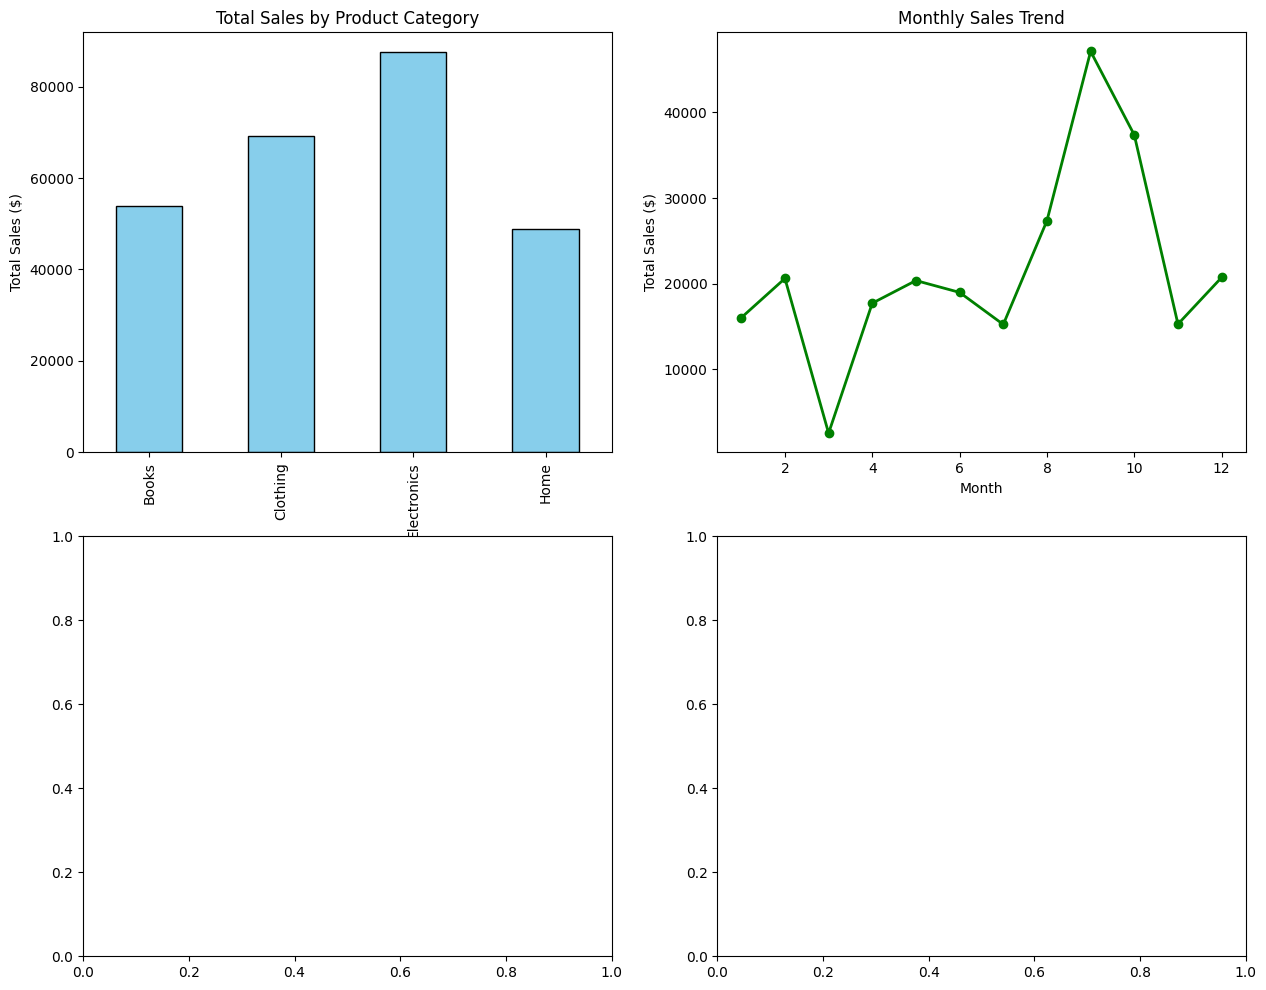

In [12]:
# Lets create a simple dashboard of related visualizations against our data set

# First we create/configure a Figure - a matplotlib container for a series of plot elements (titles, labels, legends, etc)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Total sales by category
category_sales.plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Total Sales by Product Category')
axes[0,0].set_ylabel('Total Sales ($)')

# Sales trend per month

# Converting our strings to datetime (if they're formatted right)
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])

# Deriving month from order date
# .dt lets us extract things from the datetime data in a cell - years, months, days, seconds, etc
sales_df['month'] = sales_df['order_date'].dt.month 

# Sales by month series
monthly_sales = sales_df.groupby('month')['total_sale'].sum()

monthly_sales.plot(kind='line', ax=axes[0,1], marker='o', color='green', linewidth=2)

axes[0,1].set_title('Monthly Sales Trend')
axes[0,1].set_ylabel('Total Sales ($)')
axes[0,1].set_xlabel('Month')


## Section 6: Exporting dataframes

We'll often find ourselves wanting to create new CSVs from our edited/filtered/cleaned dataframes. With pandas we can easily do that.

In [13]:
electronics_order_df.to_csv('data/electronics_sales_data.csv')